In [1]:
#### PSEUDOCODE RNN
state_t = 0 
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

NameError: name 'input_sequence' is not defined

In [2]:
state_t = 0 
for unout_t in input_sequence:
    output_t = activation(dot(W, input_t) +dot(U, state_t) +b)
    state_t = output_t

NameError: name 'input_sequence' is not defined

In [4]:
#### NUMPY IMPLEMENTATION OF A SIMPLE RNN

import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))


successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) +np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequences = np.concatenate(successive_outputs, axis = 0)

In [5]:
print(final_output_sequences)

[0.9999991  0.99999699 0.99999995 ... 1.         1.         1.        ]


In [6]:
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) +b)

In [7]:
print(output_t)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [9]:
from keras.models import Sequential 
from keras.layers import Embedding, SimpleRNN
model = Sequential()

model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()


model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = Sequential()

# stacking several recurrent layer one after the other in otder to increase
# the representional power of a network
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
#### PREPARING THE IMDB DATA 


from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('LoadingData...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words = max_features)

print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

print('Pad sequences (sample x times)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

LoadingData...
25000 train_sequences
25000 test_sequences
Pad sequences (sample x times)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [18]:
#### TRAINING THE MODEL WITH EMBEDDING AND SIMPLE RNN LAYERS 
from keras.layers import Dense

model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs =10, 
                    batch_size = 128, 
                    validation_split=0.2)



Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6286 - acc: 0.6355 - val_loss: 0.4965 - val_acc: 0.7876
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.4245 - acc: 0.8171 - val_loss: 0.5006 - val_acc: 0.7534
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3163 - acc: 0.8692 - val_loss: 0.4281 - val_acc: 0.8052
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2697 - acc: 0.8940 - val_loss: 0.4554 - val_acc: 0.7820
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2132 - acc: 0.9215 - val_loss: 0.3565 - val_acc: 0.8576
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1772 - acc: 0.9353 - val_loss: 0.3538 - val_acc: 0.8712
Epoch 7/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.

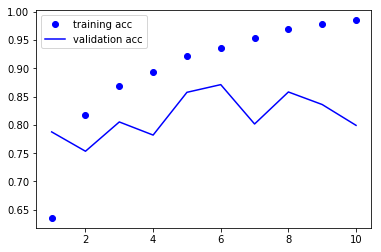

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.legend()
plt.show()

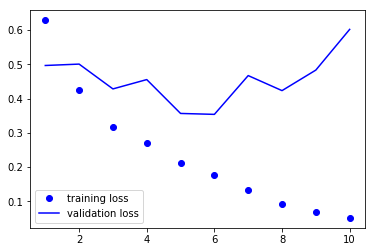

In [21]:
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.legend()
plt.show()

In [26]:
#### Pseudocode details of the LSTM architecture 1/2


#output_t = activation(dot(state_t, Uo) +dot(input_t, Wo) +dot(C_t, Vo) +bo)

#i_t = activation(dot(state_t, Ui) + dot(input_t, Wi)+bi)
#f_t = activation(dot(state_t, Uf) + dot(input_t, Wf)+bf)
#k_t = activation(dot(state_t, Uk) + fot(input_t, Wk)+bk)



In [27]:
#### Pseudocode details of the LSTM architecture 2/2

#c_t +1 = i_t * k_t + c_t * f_t



In [33]:
from keras.layers import LSTM, Embedding, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.4950 - acc: 0.7668 - val_loss: 0.3977 - val_acc: 0.8430
Epoch 2/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2860 - acc: 0.8890 - val_loss: 0.3332 - val_acc: 0.8578
Epoch 3/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2331 - acc: 0.9128 - val_loss: 0.2798 - val_acc: 0.8868
Epoch 4/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1963 - acc: 0.9281 - val_loss: 0.2845 - val_acc: 0.8840
Epoch 5/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1723 - acc: 0.9384 - val_loss: 0.3489 - val_acc: 0.8526
Epoch 6/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1580 - acc: 0.9441 - val_loss: 0.3474 - val_acc: 0.8726
Epoch 7/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1366 - acc: 0.9522 - val_loss: 0.3124 - val_acc:

In [36]:
import matplotlib.pyplot as plt

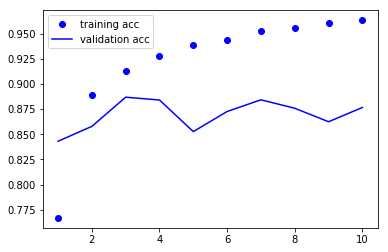

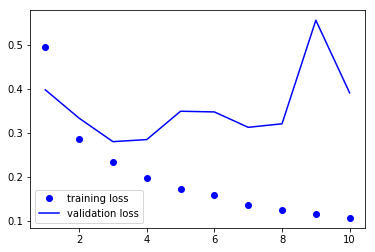

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1 )

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.legend()
plt.show()